<a href="https://colab.research.google.com/github/guimaraesabrina/AIEDSA101/blob/main/AIEDSA101_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIEDSA101

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Data Manipulation**
*(pandas & numpy concepts):*

- **`nunique`** returns the number of unique values in a Series or across DataFrame columns. It's useful to understand the diversity or cardinality of a variable.

- **`isin`** checks whether each element in a Series or DataFrame is contained in a provided list of values. It’s often used for filtering data based on specific conditions.

- **`isna`** identifies missing (NaN) values within a Series or DataFrame and returns a Boolean mask. It's commonly used for detecting and managing null entries.

- **`duplicated()`** identifies rows that are repeated in a DataFrame. It returns a Boolean series indicating which rows are duplicates of earlier rows.

---

**Data Visualization** <br>
**Statistical Analysis**

- **`heatmap`** is a type of plot (typically used with seaborn) that displays values in a matrix using color gradients. It’s useful for visualizing correlation matrices or distributions.

- **Sample variance** measures how spread out the values in a sample are from their mean. It is a key concept in statistics to understand variability.

- **`hue` (plot)** is a parameter in seaborn plots that adds a categorical separation by color. It allows you to compare subgroups within your data visually.

- **`histplot`** is used to plot histograms — it shows the distribution of a single variable by grouping values into bins and plotting the frequency of each.

- **Skew** refers to the asymmetry of a distribution. A positive skew has a longer right tail; a negative skew has a longer left tail. It helps in understanding how your data deviates from a normal distribution.

- **`np.random.seed(42)`** sets a fixed starting point for NumPy's random number generator. It ensures that results involving randomness are reproducible.

- **`kde` (Kernel Density Estimation)** plots an estimate of the probability density function of a continuous variable, giving a smooth curve over a histogram-like plot.

- **`corr_matrix`** (correlation matrix) is a table showing correlation coefficients between variables. It helps assess the strength and direction of linear relationships.

- **Pivot tables** rearrange and summarize data for easy analysis. With rows and columns representing different variables, they’re useful for grouping and aggregating data quickly.

---

**Machine Learning concepts** *(mostly from scikit-learn)*

- **`KFold`** is a cross-validation technique where the dataset is split into _k_ equal-sized parts (folds). The model is trained _k_ times, each time using a different fold as the validation set and the remaining as training data.

- **`MinMaxScaler`** scales features to a specific range (usually 0 to 1). It preserves the shape of the distribution but shifts and compresses the values so they're all within the chosen bounds.

- **Cross-validation** is a model evaluation method that splits the dataset into multiple training and validation sets to ensure that the model performs well across different subsets and isn’t overfitting.


In [2]:
# list comprehension
my_list = [15, 18, 17, 12, 11, 7, 8]
filterd_list = [num for num in my_list if num >= 15]
print(filterd_list)

[15, 18, 17]


In [3]:
# groupby
data = {'Country': ['USA', 'Canada', 'UK', 'USA', 'Canada', 'UK'],
        'Product': ['Apparel', 'Apparel', 'Apparel', 'Footwear', 'Footwear', 'Footwear'],
        'Sales': [120000, 90000, 75000, 150000, 80000, 95000]}

sales = pd.DataFrame(data)

grouped_sales = sales.groupby(["Country", "Product"])[["Sales"]].mean()
grouped_sales

Sales
Country Product           
Canada  Apparel    90000.0
        Footwear   80000.0
UK      Apparel    75000.0
        Footwear   95000.0
USA     Apparel   120000.0
        Footwear  150000.0

In [5]:
# survey mock dataset
# notna
data = {'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gender': ['M', 'F', 'M', 'F', 'M', 'M', np.nan, 'F', 'M', 'F'],
        'school': ['A', 'B', 'A', 'B', 'A', 'A', 'B', np.nan, 'A', 'B'],
        'parental_educ': ['High', 'College', 'High', 'College', np.nan, 'High', 'College', 'High', 'College', 'High'],
        'first_exam': [85, 90, 78, 92, np.nan, 70, 88, 75, 95, 80],
        'second_exam': [70, 80, 75, 85, 90, 92, 78, 88, 93, 82]}
survey = pd.DataFrame(data)

non_missing = survey.notna()
print(non_missing)

   student_id  gender  school  parental_educ  first_exam  second_exam
0        True    True    True           True        True         True
1        True    True    True           True        True         True
2        True    True    True           True        True         True
3        True    True    True           True        True         True
4        True    True    True          False       False         True
5        True    True    True           True        True         True
6        True   False    True           True        True         True
7        True    True   False           True        True         True
8        True    True    True           True        True         True
9        True    True    True           True        True         True


In [7]:
# nunique
data = {'Column A': [1, 2, 3, 1, 4, 2],
        'Column B': ['A', 'B', 'C', 'A', 'D', 'B']}
df = pd.DataFrame(data)

unique_count = df['Column A'].nunique()
print(unique_count)

4


In [8]:
# isin
data = {'school': ['Public', 'Private', 'Other', 'Public', 'Private', 'Vocational', 'Public']}
df = pd.DataFrame(data)

print(df['school'].isin(['Public', 'Private']))

0     True
1     True
2    False
3     True
4     True
5    False
6     True
Name: school, dtype: bool


In [9]:
# isna
data = {'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'gender': ['M', 'F', 'M', 'F', 'M', 'M', np.nan, 'F', 'M', 'F'],
        'school': ['A', 'B', 'A', 'B', 'A', 'A', 'B', np.nan, 'A', 'B'],
        'parental_educ': ['High', 'College', 'High', 'College', np.nan, 'High', 'College', 'High', 'College', 'High'],
        'first_exam': [85, 90, 78, 92, np.nan, 70, 88, 75, 95, 80],
        'second_exam': [70, 80, 75, 85, 90, 92, 78, 88, 93, 82]}
survey = pd.DataFrame(data)

missing_values = survey.isna() # or survey.isnull()
print(missing_values)

   student_id  gender  school  parental_educ  first_exam  second_exam
0       False   False   False          False       False        False
1       False   False   False          False       False        False
2       False   False   False          False       False        False
3       False   False   False          False       False        False
4       False   False   False           True        True        False
5       False   False   False          False       False        False
6       False    True   False          False       False        False
7       False   False    True          False       False        False
8       False   False   False          False       False        False
9       False   False   False          False       False        False


In [12]:
# duplicated()
data = {'col1': [1, 2, 3, 1, 4],
        'col2': ['A', 'B', 'C', 'A', 'D']}
df = pd.DataFrame(data)
# print(df)

number_of_duplicate_rows = df.duplicated().sum()
print(number_of_duplicate_rows)

1


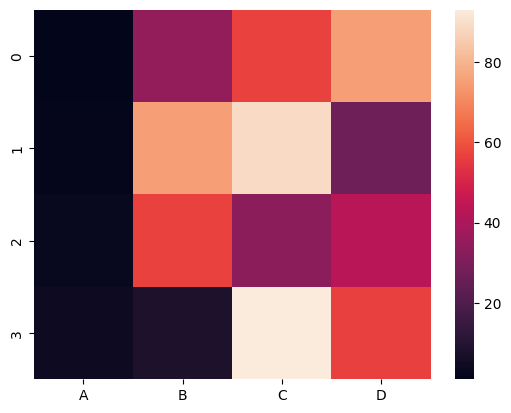

In [13]:
# heatmap
data = {'A': [1, 2, 3, 4],
        'B': [35, 75, 57, 8],
        'C': [57, 89, 33, 93],
        'D': [75, 27, 43, 56]}
df = pd.DataFrame(data)

min_val = df.min().min() # finds the min
max_val = df.max().max() # finds the max

sns.heatmap(data=df, vmin=min_val, vmax=max_val)
plt.show()

In [15]:
import math

sdev1 = 10.5
sample_variance = sdev1 ** 2  # Ou sdev1 * sdev1
print("The sample variance is:", sample_variance)

The sample variance is: 110.25


In [18]:
# from scipy import stats

# # create a NumPy array
# arr = np.array([10, 20, 30, 20, 40, 30, 30, 20])

# # calculate the most frequent value of the array
# val = stats.mode(arr)[1][1]

# print(val)

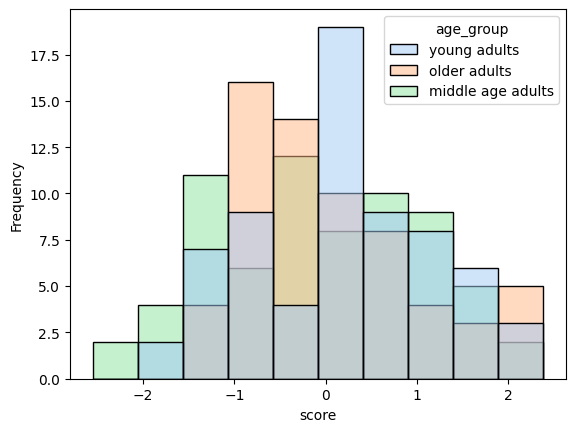

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
df = pd.DataFrame({
    'score': np.random.randn(200),
    'age_group': np.random.choice(['young adults', 'middle age adults', 'older adults'], size=200)
})

sns.histplot(data=df, x="score", hue="age_group", palette='pastel')
plt.ylabel('Frequency')
plt.show()

In [20]:
data = {'test_scores': [80, 85, 90, 95],
        'test_preparation_hours': [10, 25, 30, 30]}
df = pd.DataFrame(data)

# calculate the skewness of test_preparation_hours columns
test_preparation_hours_skewness = df['test_preparation_hours'].skew()

print("The skewness of the test preparation hours is:", test_preparation_hours_skewness)

The skewness of the test preparation hours is: -1.658523800287803


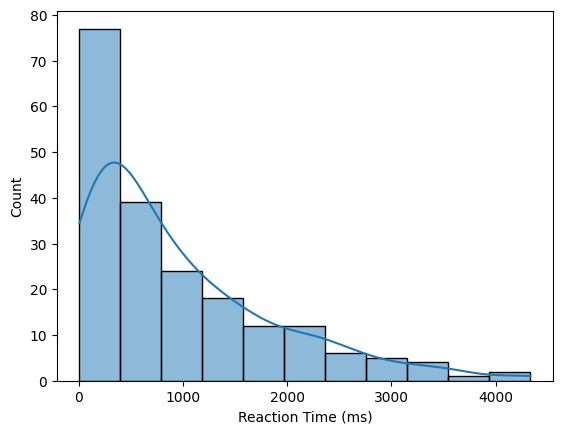

In [21]:
np.random.seed(42)
df = pd.DataFrame({
    'participant_id': range(1, 201),
    'reaction_time': np.random.exponential(scale=1000, size=200).astype(int)
})

# plot variable
sns.histplot(data=df['reaction_time'], kde=True)
plt.xlabel('Reaction Time (ms)')

# show the plot
plt.show()

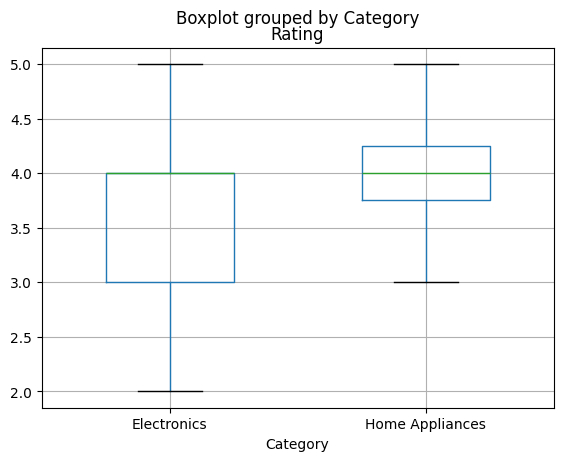

In [22]:
data = {'Category': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics',
                     'Home Appliances', 'Home Appliances', 'Home Appliances', 'Home Appliances'],
        'Rating': [3, 5, 4, 4, 2, 4, 5, 3, 4]}
df = pd.DataFrame(data)

df.boxplot(by='Category', column='Rating', widths=0.5)
plt.show()

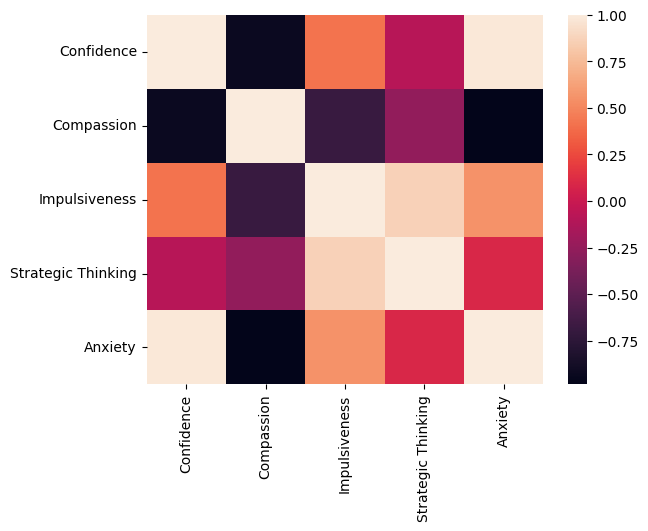

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Confidence': [8.2, 3.4, 6.1, 8.9],
    'Compassion': [5.6, 7.9, 6.2, 3.5],
    'Impulsiveness': [3.1, 4.6, 2.8, 9.3],
    'Strategic Thinking': [6.7, 8.1, 7.2, 8.6],
    'Anxiety': [6.4, 2.7, 5.3, 8.2]
}
df = pd.DataFrame(data)

# get correlations
corr_matrix = df.corr()

# plot variables
sns.heatmap(corr_matrix)

# show the plot
plt.show()

In [24]:
import numpy as np
from scipy.stats import skew # Importa a função skew

# array
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# calculate skewness of the array
arr_skewness = skew(arr) # Usa a função skew importada

print("The skewness of the array is:", arr_skewness)

The skewness of the array is: 0.0


In [25]:
data = {
    'store': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'product': ['x', 'x', 'y', 'y', 'z', 'z', 'x', 'y'],
    'price': [10, 12, 15, 14, 8, 9, 11, 13]
}
df = pd.DataFrame(data)

pivot = df.pivot_table(values='price', index='store', columns='product', aggfunc='mean')
print(pivot)

product     x     y    z
store                   
A        10.5  15.0  8.0
B        12.0  13.5  9.0


### Model Development for AI
- scikit learn
- PyTorch

In [26]:
# SDG optimize
# CrossEntropyLoss

import torch
import torch.nn as nn
import torch.optim as optim

# dummy model class
class DummyDataset(torch.utils.data.Dataset):
    def __init__(self, num_samples=100):
        self.data = torch.randn(num_samples, 4) # input features
        self.labels = torch.randint(0, 3, (num_samples,)) # 3 classes

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

model = nn.Sequential(
    nn.Linear(4, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

dummy_dataset = DummyDataset()
train_loader = torch.utils.data.DataLoader(dummy_dataset, batch_size=10, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
training_losses = []
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    average_loss = running_loss / len(train_loader)
    training_losses.append(average_loss)
print(training_losses)

[1.0865477561950683, 1.084289836883545, 1.0818488836288451, 1.0796376168727875, 1.0775334596633912]


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

# dummy model
model = nn.Sequential(
    nn.Linear(10, 5),
    nn.ReLU()
)

learning_rate = 0.001
beta1 = 0.9
beta2 = 0.999
optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(beta1, beta2))

# verify optimizer
print(f"Optimizer: {type(optimizer).__name__}")

Optimizer: Adam


In [28]:
from sklearn.model_selection import train_test_split

# create dummy data for X and Y for runtime and demonstration purposes
# creating an imbalanced dataset
np.random.seed(0)
X = np.random.rand(200, 10) # 200 samples, 10 features
Y = np.concatenate((np.zeros(150), np.ones(50))).astype(int)
np.random.shuffle(Y)

# split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

print(f'Class distribution in training set: {np.bincount(y_train.astype(int))}')
print(f'Class distribution in testing set: {np.bincount(y_test.astype(int))}')

Class distribution in training set: [112  38]
Class distribution in testing set: [38 12]


In [29]:
import torch.nn as nn

# define a single neural network layer with specified input and output sizes.
layer = nn.Linear(in_features=10, out_features=5)
print(layer)

Linear(in_features=10, out_features=5, bias=True)


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

np.random.seed(0)
X = np.random.rand(100, 5) # 100 amostras, 5 features
Y = np.random.randint(0, 2, 100) # 100 rótulos de classe 0 ou 1

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

param_grid = {
    'scaler__with_mean': [True, False],
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3)
grid_search.fit(X, Y)

print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'scaler__with_mean': True, 'svc__C': 1, 'svc__kernel': 'rbf'}


In [31]:
import torch
from sklearn.model_selection import train_test_split

# iris data dummy
data = {
    'feature1': np.random.rand(150),
    'feature2': np.random.rand(150),
    'feature3': np.random.rand(150),
    'feature4': np.random.rand(150),
    'label': np.repeat([0, 1, 2], 50) # 50 de cada classe para simular o iris
}
iris_data = pd.DataFrame(data)
iris_data = iris_data.sample(frac=1, random_state=42).reset_index(drop=True)


X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.39966001 0.55460339 0.59085755 0.89377276]
 [0.6191828  0.00746832 0.31891733 0.26628399]
 [0.02494472 0.88520727 0.17863564 0.78866096]
 [0.04297641 0.42184452 0.76074357 0.49011026]
 [0.18906266 0.93150503 0.39243057 0.70427129]
 [0.43415558 0.09749338 0.963741   0.92119221]
 [0.54212945 0.71292685 0.58559338 0.04679179]
 [0.00120757 0.82479771 0.06099501 0.78695414]
 [0.33563098 0.25402523 0.5208748  0.07275408]
 [0.35450605 0.57184364 0.38644741 0.55005451]
 [0.59278027 0.66771489 0.08738269 0.52641254]
 [0.43260636 0.97854755 0.72499409 0.48137523]
 [0.30925129 0.72218402 0.194901   0.45239897]
 [0.43178493 0.36446268 0.49735684 0.68541493]
 [0.56278312 0.87110253 0.20407206 0.93107659]
 [0.40276676 0.89534511 0.988749   0.65122756]
 [0.72052752 0.35720742 0.89795594 0.76963376]
 [0.56157728 0.85446003 0.71199058 0.16431932]
 [0.32056533 0.17009964 0.08507608 0.26678816]
 [0.65230895 0.90010213 0.57821035 0.06077816]
 [0.28115297 0.72724991 0.00968332 0.69594686]
 [0.23804352 

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# dummy data
np.random.seed(0)
data = {
    'numeric_col1': np.random.rand(100) * 100,
    'numeric_col2': np.random.rand(100) * 50,
    'categorical_col1': np.random.choice(['A', 'B', 'C'], 100),
    'categorical_col2': np.random.choice(['X', 'Y'], 100),
    'target': np.random.randint(0, 2, 100)
}
df_dummy = pd.DataFrame(data)

X = df_dummy[['numeric_col1', 'numeric_col2', 'categorical_col1', 'categorical_col2']]
y = df_dummy['target']

numeric_features = ['numeric_col1', 'numeric_col2']
categorical_features = ['categorical_col1', 'categorical_col2']


# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'preprocessor__num__scaler__with_mean': [True, False],
    'classifier__max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3)
grid_search.fit(X, y)

print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'classifier__max_depth': None, 'preprocessor__num__scaler__with_mean': True}


In [33]:
from sklearn.model_selection import KFold
import numpy as np

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([0, 1, 0, 1, 0, 1])

kf = KFold(n_splits=3)
print(kf)

KFold(n_splits=3, random_state=None, shuffle=False)


In [34]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# dummy data
X = np.array([[1., -1.,  2.],
              [2.,  0.,  0.],
              [0.,  1., -1.]])


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled data:", X_scaled)
print("Min:", X_scaled.min(axis=0))
print("Max:", X_scaled.max(axis=0))

Scaled data: [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
Min: [0. 0. 0.]
Max: [1. 1. 1.]


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# dummy data
X = np.random.rand(100, 5) # 100 amostras, 5 features
y = np.random.randint(0, 2, 100) # 100 rótulos de classe 0 ou 1

model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.55 0.5  0.5  0.6  0.55]
Mean accuracy: 0.54


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# dummy data
np.random.seed(42)
X = np.random.rand(150, 4)
y = np.concatenate([np.zeros(50), np.ones(50), np.full(50, 2)]).astype(int)
np.random.shuffle(y)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = DecisionTreeClassifier(random_state=42) # Adiciona random_state para reprodutibilidade
model.fit(X_train, y_train)

# make predictions and generate confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# output confusion matrix
print(conf_matrix)

[[3 2 1]
 [3 6 2]
 [8 2 3]]


In [37]:
# NumPy dummy arrays to predictions and targets
predictions = np.array([0.1, 0.2, 0.3, 0.4])
targets = np.array([0.2, 0.3, 0.3, 0.5])

# convert predictions and targets to PyTorch tensors
predictions_tensor = torch.from_numpy(predictions).float()
targets_tensor = torch.from_numpy(targets).float()

# define Mean Squared Error loss function
criterion = nn.MSELoss()

# compute the loss
loss = criterion(predictions_tensor, targets_tensor)
print(f'Loss: {loss.item()}')

Loss: 0.007500000298023224


In [38]:
# softmax

layer = nn.Sequential(
    nn.Linear(in_features=10, out_features=4),
    nn.Softmax(dim=1)
)
print(layer)

Sequential(
  (0): Linear(in_features=10, out_features=4, bias=True)
  (1): Softmax(dim=1)
)


In [39]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
data = {
    'height_cm': np.random.normal(170, 10, 100),
    'weight_kg': np.random.normal(70, 15, 100),
    'age_years': np.random.normal(30, 5, 100)
}
df = pd.DataFrame(data)

# select features to scale
features = ['height_cm', 'weight_kg', 'age_years']
X = df[features]

# initialize the scaler
scaler = StandardScaler()

# fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=features)
print(df_scaled.head())

   height_cm  weight_kg  age_years
0   0.664619  -1.515115   0.271485
1  -0.038089  -0.466809   0.459646
2   0.831697  -0.384681   0.943743
3   1.800406  -0.868997   0.916631
4  -0.144206  -0.193479  -1.337135


In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# 1. load data
# load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# tensors to pytorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long) # CrossEntropyLoss espera labels como Long

# train and test split
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=16)

# 2. setup model
# (4 input features, 3 output class)
class SimpleIrisNet(nn.Module):
    def __init__(self):
        super(SimpleIrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleIrisNet()
criterion = nn.CrossEntropyLoss()

# loop training here (prod)
optimizer = optim.SGD(model.parameters(), lr=0.01)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

for epoch in range(5):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# evaluate mode
model.eval()
validation_losses = []
val_loss = 0.0
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
validation_losses.append(val_loss / len(val_loader))
print("Validation Loss:", validation_losses)

Validation Loss: [1.0076082944869995]
